# Demo: visualize Copernicus-Bench datasets

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import geopandas as gpd
from shapely.geometry import Point

In [2]:
def normalize(img):
    # w,h,c
    h, w, c = img.shape
    for i in range(c):
        p1 = np.percentile(img[:, :, i], 1)
        p99 = np.percentile(img[:, :, i], 99)
        img[:, :, i] = (img[:, :, i] - p1) / (p99 - p1)
        # clip
        img[:, :, i] = np.clip(img[:, :, i], 0, 1)

    return img

### Cloud-S2

In [12]:
## Cloud-S2
from src.datasets.cobench_clouds2_wrapper import CoBenchCloudS2

root_dir = './data/copernicusbench/cloud_s2/cloud_s2'
bands = ['B04', 'B03', 'B02']
dataset_train = CoBenchCloudS2(
            root=root_dir, split="train", bands=bands, transforms=None
        )
dataset_val = CoBenchCloudS2(
            root=root_dir, split="val", bands=bands, transforms=None
        )
dataset_test = CoBenchCloudS2(
            root=root_dir, split="test", bands=bands, transforms=None
        )

(-0.5, 511.5, 511.5, -0.5)

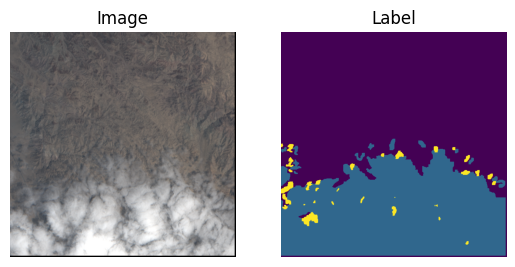

In [13]:
ID = 3

img = dataset_train[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
mask = dataset_train[ID]['mask']


plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title('Label')
plt.axis('off')
#plt.show()

# save pdf
#plt.savefig('./assets/vis_cloud_s2_2.pdf', bbox_inches='tight')

In [14]:
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=4, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=False, num_workers=4)


# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)

100%|██████████| 138/138 [00:08<00:00, 15.99it/s]


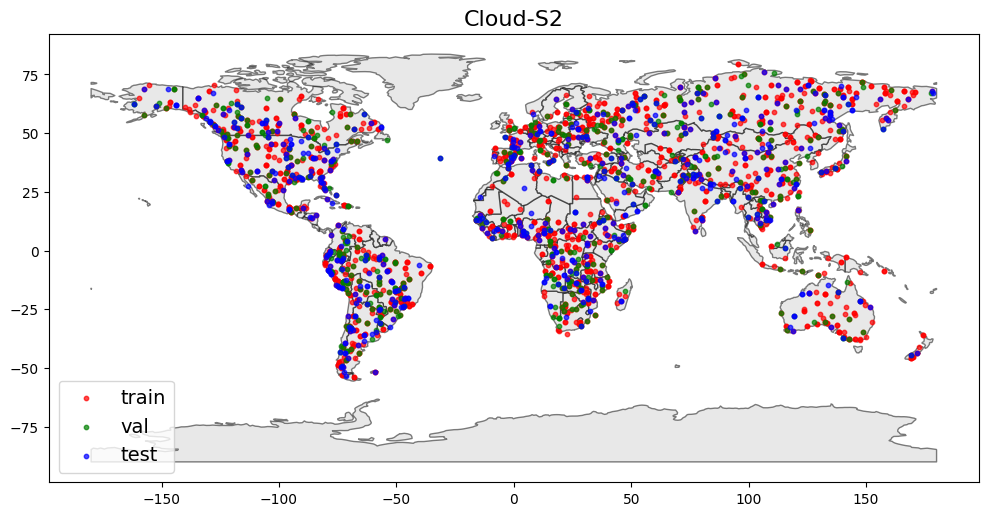

In [15]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("Cloud-S2", fontsize=16)
plt.legend(fontsize=14, loc="lower left")
#plt.tight_layout()


# save pdf
#plt.savefig('./assets/distribution_cloud_s2.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_cloud_s2.png', bbox_inches='tight', dpi=100)

### Cloud-S3

In [3]:
## Cloud-S3
from src.datasets.cobench_clouds3_wrapper import CoBenchCloudS3

root_dir = './data/copernicusbench/cloud_s3olci/cloud_s3'
bands = ['Oa08_radiance', 'Oa06_radiance', 'Oa04_radiance']
dataset_train = CoBenchCloudS3(
            root=root_dir, split="train", bands=bands, mode='multi', transforms=None
        )
dataset_val = CoBenchCloudS3(
            root=root_dir, split="val", bands=bands, mode='multi', transforms=None
        )
dataset_test = CoBenchCloudS3(
            root=root_dir, split="test", bands=bands, mode='multi', transforms=None
        )

(-0.5, 255.5, 255.5, -0.5)

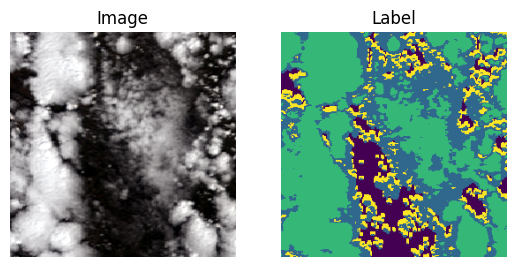

In [4]:
ID = 2
img = dataset_train[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
mask = dataset_train[ID]['mask']

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title('Label')
plt.axis('off')
#plt.show()

# save pdf
#plt.savefig('./assets/vis_cloud_s3_1_bin.pdf', bbox_inches='tight')

In [5]:
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=4, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


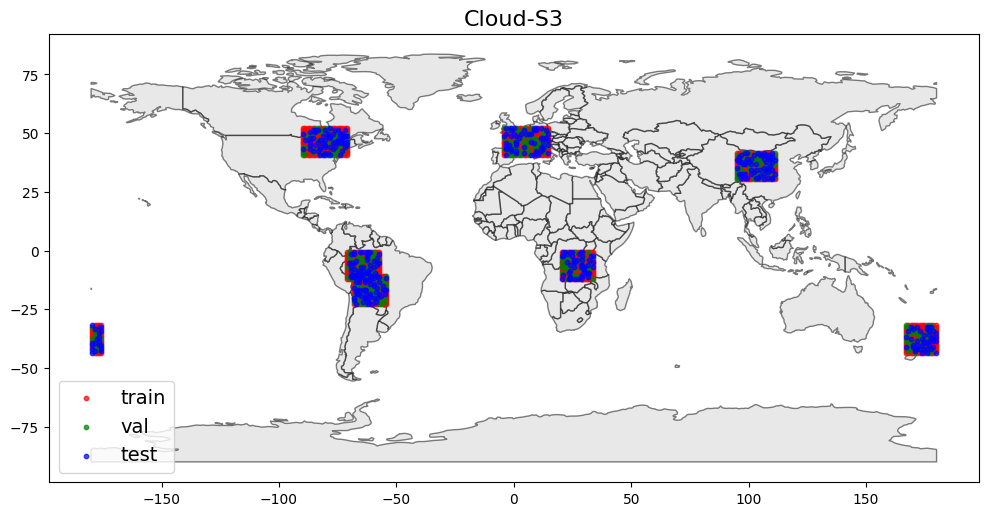

In [ ]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

coords_train[coords_train[:, 0] > 180, 0] = coords_train[coords_train[:, 0] > 180, 0] - 360
coords_val[coords_val[:, 0] > 180, 0] = coords_val[coords_val[:, 0] > 180, 0] - 360
coords_test[coords_test[:, 0] > 180, 0] = coords_test[coords_test[:, 0] > 180, 0] - 360


geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("Cloud-S3", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_cloud_s3.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_cloud_s3.png', bbox_inches='tight', dpi=100)

### EuroSAT-S1 & EuroSAT-S2

In [8]:
## EuroSAT
from src.datasets.cobench_eurosats1_wrapper import CoBenchEuroSATS1
from src.datasets.cobench_eurosats2_wrapper import CoBenchEuroSATS2

root_dir_s1 = './data/copernicusbench/eurosat_s1sar/eurosat_s1'
bands_s1 = ['VV', 'VH']
dataset_train_s1 = CoBenchEuroSATS1(
            root=root_dir_s1, split="train", bands=bands_s1, transforms=None
        )

root_dir_s2 = './data/copernicusbench/eurosat_s2ms/eurosat_s2'
bands_s2 = ['B04', 'B03', 'B02']
dataset_train_s2 = CoBenchEuroSATS2(
            root=root_dir_s2, split="train", bands=bands_s2, transforms=None
        )
dataset_val_s2 = CoBenchEuroSATS2(
            root=root_dir_s2, split="val", bands=bands_s2, transforms=None
        )
dataset_test_s2 = CoBenchEuroSATS2(
            root=root_dir_s2, split="test", bands=bands_s2, transforms=None
        )

2 2


Text(0.5, -0.0, 'HerbaceousVegetation')

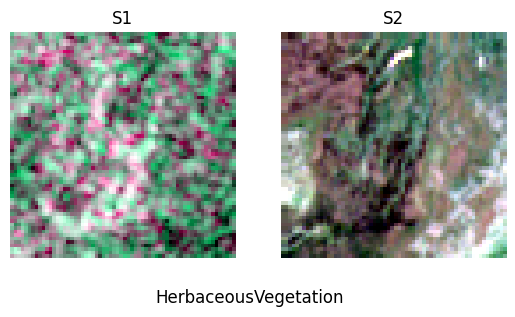

In [9]:
ID = 2
img = dataset_train_s1[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
img = np.stack([img[:,:,0], img[:,:,1], (img[:,:,0]+img[:,:,1])/2], axis=-1)
label = dataset_train_s1[ID]['label']

img2 = dataset_train_s2[ID]['image']
img2 = img2.permute(1, 2, 0).numpy()
img2 = normalize(img2)
label2 = dataset_train_s2[ID]['label']

print(label, label2)
# label id to class
label = dataset_train_s1.classes[label]
label2 = dataset_train_s2.classes[label2]


plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('S1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('S2')
plt.axis('off')
#plt.show()
# print one label for both in the figure
#plt.suptitle('Comparison of S1 and S2', fontsize=14)
#plt.text(0.5, 20, 'Sentinel Images', ha='center', fontsize=12)
plt.subplots_adjust(bottom=-0.28)  # Reduce bottom margin
plt.suptitle(label, y=-0.0)

# save pdf
#plt.savefig('./assets/vis_eurosat_s12_2.pdf', bbox_inches='tight')

In [10]:
dataloader_train = torch.utils.data.DataLoader(dataset_train_s2, batch_size=64, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val_s2, batch_size=64, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test_s2, batch_size=64, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 85/85 [00:42<00:00,  1.99it/s]


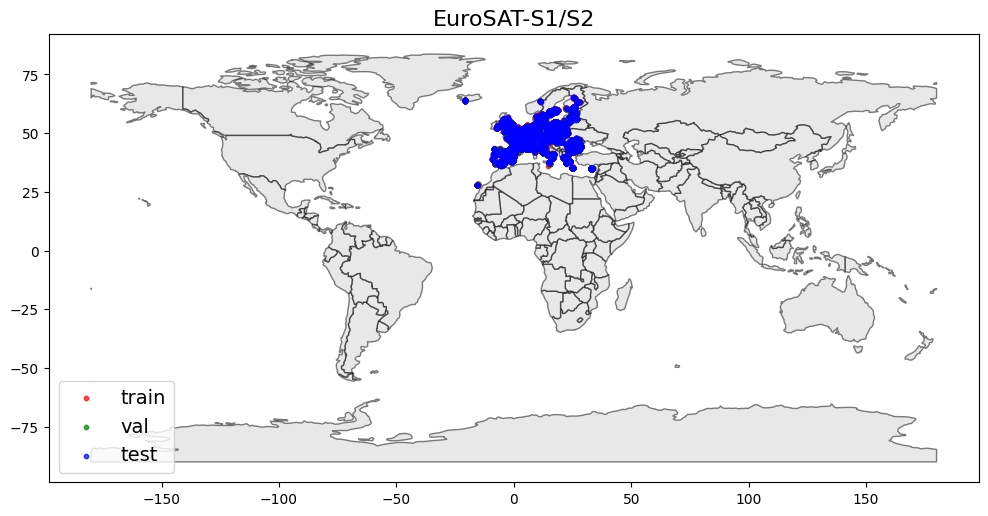

In [ ]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("EuroSAT-S1/S2", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_eurosat.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_eurosat.png', bbox_inches='tight', dpi=100)

### BigEarthNet-S1 & BigEarthNet-S2

In [15]:
### BigEarthNet-S1/S2

from src.datasets.cobench_bigearthnets12_wrapper import CoBenchBigEarthNetS12

root_dir = './data/copernicusbench/bigearthnetv2_s1s2/bigearthnet_s1s2'
bands_s1 = ['VV', 'VH']
bands_s2 = ['B04', 'B03', 'B02']

dataset_train_s1 = CoBenchBigEarthNetS12(
            root=root_dir,
            split="train",
            modality='s1',
            bands=bands_s1,
            transforms=None
        )

dataset_train_s2 = CoBenchBigEarthNetS12(
            root=root_dir,
            split="train",
            modality='s2',
            bands=bands_s2,
            transforms=None
        )

dataset_val_s2 = CoBenchBigEarthNetS12(
            root=root_dir,
            split="val",
            modality='s2',
            bands=bands_s2,
            transforms=None
        )

dataset_test_s2 = CoBenchBigEarthNetS12(
            root=root_dir,
            split="test",
            modality='s2',
            bands=bands_s2,
            transforms=None
        )

tensor([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Text(0.5, -0.0, "['Arable land', 'Pastures', 'Broad-leaved forest', 'Coniferous forest']")

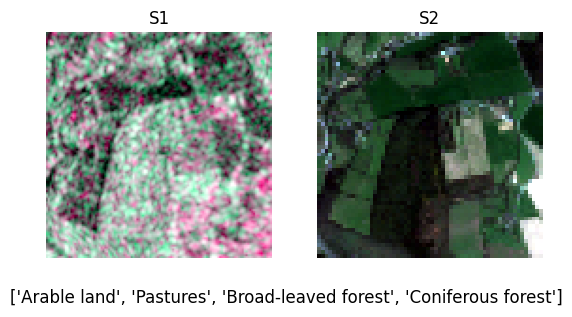

In [16]:
# visualize one example
ID = 0
img = dataset_train_s1[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
img = np.stack([img[:,:,0], img[:,:,1], (img[:,:,0]+img[:,:,1])/2], axis=-1)
label = dataset_train_s1[ID]['label']

img2 = dataset_train_s2[ID]['image']
img2 = img2.permute(1, 2, 0).numpy()
img2 = normalize(img2)
label2 = dataset_train_s2[ID]['label']

print(label, label2)
# label id to class
ml_label = []
for i in range(19):
    if label[i] == 1:
        ml_label.append(dataset_train_s1.class_names[i])
label = ml_label



plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('S1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('S2')
plt.axis('off')
#plt.show()
# print one label for both in the figure
#plt.suptitle('Comparison of S1 and S2', fontsize=14)
#plt.text(0.5, 20, 'Sentinel Images', ha='center', fontsize=12)
plt.subplots_adjust(bottom=-0.28)  # Reduce bottom margin
plt.suptitle(label, y=-0.0)

# save pdf
#plt.savefig('./assets/vis_bigearthnet_s12_2.pdf', bbox_inches='tight')

In [17]:
# plot geographical distribution

dataloader_train = torch.utils.data.DataLoader(dataset_train_s2, batch_size=32, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val_s2, batch_size=32, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test_s2, batch_size=32, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 188/188 [00:36<00:00,  5.11it/s]


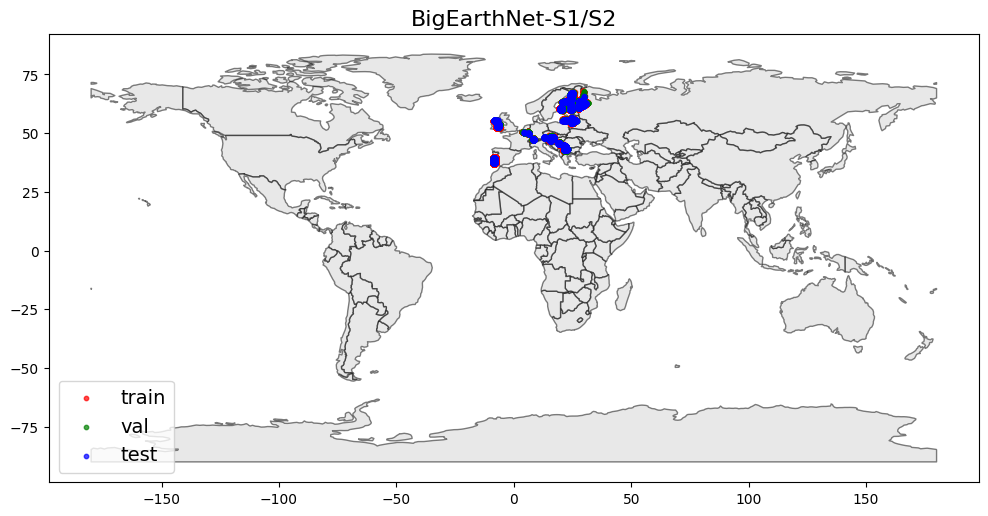

In [ ]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("BigEarthNet-S1/S2", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_bigearthnet.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_bigearthnet.png', bbox_inches='tight', dpi=100)

### LC100Cls-S3 & LC100Seg-S3

In [19]:
### LC100Cls-S3 and LC100Seg-S3
from src.datasets.cobench_lc100clss3_wrapper import CoBenchLC100ClsS3
from src.datasets.cobench_lc100segs3_wrapper import CoBenchLC100SegS3

root_dir_cls = './data/copernicusbench/lc100_s3olci/lc100_s3'
bands_cls = ['Oa08_radiance', 'Oa06_radiance', 'Oa04_radiance']
dataset_train_cls = CoBenchLC100ClsS3(
            root=root_dir_cls, split="train", bands=bands_cls, mode='static', transforms=None
        )
dataset_train_cls_se = CoBenchLC100SegS3(
            root=root_dir_cls, split="train", bands=bands_cls, mode='series', transforms=None
        )    

root_dir_seg = './data/copernicusbench/lc100_s3olci/lc100_s3'
bands_seg = ['Oa08_radiance', 'Oa06_radiance', 'Oa04_radiance']
dataset_train_seg = CoBenchLC100SegS3(
            root=root_dir_seg, split="train", bands=bands_seg, mode='static', transforms=None
        )
dataset_train_seg_se = CoBenchLC100SegS3(
            root=root_dir_seg, split="train", bands=bands_seg, mode='series', transforms=None
        )


LC100_ID_TO_NAME = {
    0: "unknown",
    1: "shrubs",
    2: "herbaceous vegetation",
    3: "cultivated and managed vegetation/agriculture",
    4: "urban / built-up",
    5: "bare / sparse vegetation",
    6: "snow and ice",
    7: "permanent water bodies",
    8: "herbaceous wetland",
    9: "moss and lichen",
    10: "closed forest, evergreen needle leaf",
    11: "closed forest, evergreen broad leaf",
    12: "closed forest, deciduous needle leaf",
    13: "closed forest, deciduous broad leaf",
    14: "closed forest, mixed",
    15: "closed forest, other",
    16: "open forest, evergreen needle leaf",
    17: "open forest, evergreen broad leaf",
    18: "open forest, deciduous needle leaf",
    19: "open forest, deciduous broad leaf",
    20: "open forest, mixed",
    21: "open forest, other",
    22: "oceans, seas",
}

dataset_val_cls = CoBenchLC100ClsS3(
            root=root_dir_cls, split="val", bands=bands_cls, mode='static', transforms=None
        )

dataset_test_cls = CoBenchLC100ClsS3(
            root=root_dir_cls, split="test", bands=bands_cls, mode='static', transforms=None
        )


tensor([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Text(0.5, -0.0, "['shrubs', 'herbaceous vegetation', 'urban / built-up', 'bare / sparse vegetation', 'permanent water bodies', 'herbaceous wetland']")

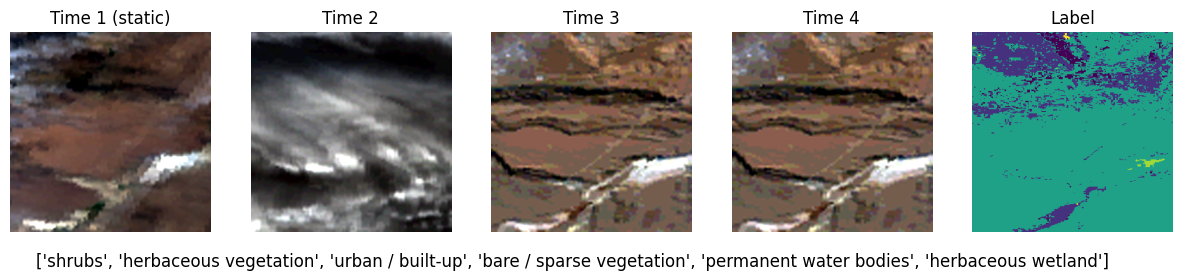

In [ ]:
# visualize one example
ID = 23
img = dataset_train_cls[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
#img = np.stack([img[:,:,0], img[:,:,1], (img[:,:,0]+img[:,:,1])/2], axis=-1)
label = dataset_train_cls[ID]['label']

ts_imgs = dataset_train_seg_se[ID]['image']
for i in range(len(ts_imgs)):
    ts_imgs[i] = ts_imgs[i].permute(1, 2, 0).numpy()
    ts_imgs[i] = normalize(ts_imgs[i])

#label2 = dataset_train_seg_se[ID]['label']

print(label)
#print(label2)
# label id to class
ml_label = []
for i in range(23):
    if label[i] == 1:
        ml_label.append(LC100_ID_TO_NAME[i])
label = ml_label

label_seg = dataset_train_seg[ID]['mask']

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(ts_imgs[0])
plt.title('Time 1 (static)')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(ts_imgs[1])
plt.title('Time 2')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(ts_imgs[2])
plt.title('Time 3')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(ts_imgs[3])
plt.title('Time 4')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(label_seg)
plt.title('Label')
plt.axis('off')

plt.subplots_adjust(bottom=-0.4)  # Reduce bottom margin
plt.suptitle(label, y=-0.0)

# save pdf
#plt.savefig('./assets/vis_lc100_s3_2.pdf', bbox_inches='tight')

In [21]:
# plot geographical distribution

dataloader_train = torch.utils.data.DataLoader(dataset_train_cls, batch_size=16, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val_cls, batch_size=16, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test_cls, batch_size=16, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 108/108 [00:15<00:00,  7.10it/s]


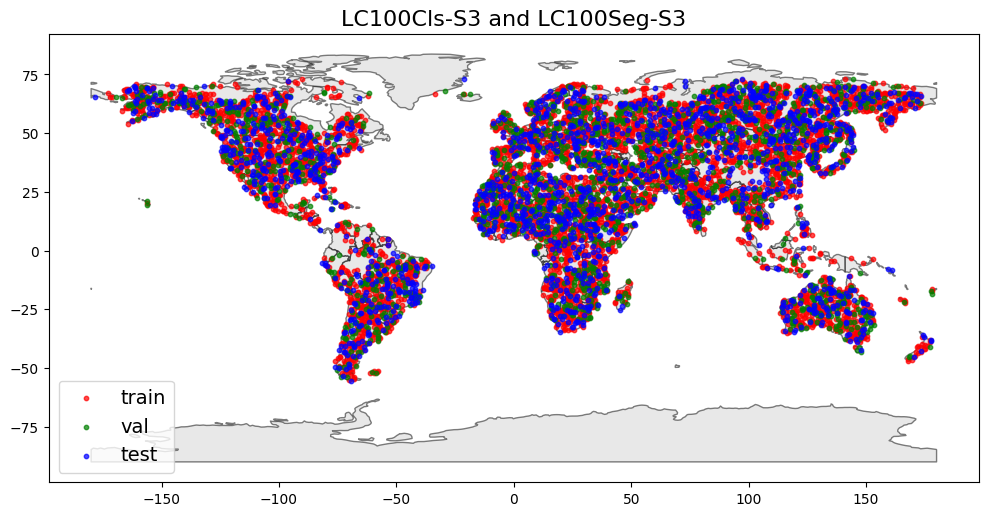

In [22]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("LC100Cls-S3 and LC100Seg-S3", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_lc100_s3.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_lc100_s3.png', bbox_inches='tight', dpi=100)

### DFC2020-S1 & DFC2020-S2

In [23]:
### DFC2020-S1/S2
from src.datasets.cobench_dfc2020s12_wrapper import CoBenchDFC2020S12

root_dir = './data/copernicusbench/dfc2020_s1s2/dfc2020_s1s2'

bands_s1 = ['VV', 'VH']
bands_s2 = ['B04', 'B03', 'B02']

dataset_train_s1 = CoBenchDFC2020S12(
            root=root_dir,
            split="train",
            bands=bands_s1,
            modality='s1',
            transforms=None
        )

dataset_train_s2 = CoBenchDFC2020S12(
            root=root_dir,
            split="train",
            bands=bands_s2,
            modality='s2',
            transforms=None
        )

dataset_val_s2 = CoBenchDFC2020S12(
            root=root_dir,
            split="val",
            bands=bands_s2,
            modality='s2',
            transforms=None
        )

dataset_test_s2 = CoBenchDFC2020S12(
            root=root_dir,
            split="test",
            bands=bands_s2,
            modality='s2',
            transforms=None
        )


(-0.5, 255.5, 255.5, -0.5)

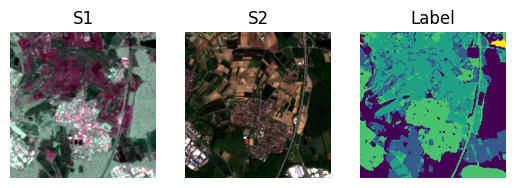

In [24]:
ID = 1
img = dataset_train_s1[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)
img = np.stack([img[:,:,0], img[:,:,1], (img[:,:,0]+img[:,:,1])/2], axis=-1)
mask = dataset_train_s1[ID]['mask']

img2 = dataset_train_s2[ID]['image']
img2 = img2.permute(1, 2, 0).numpy()
img2 = normalize(img2)
mask2 = dataset_train_s2[ID]['mask']


plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('S1')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title('S2')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(mask)
plt.title('Label')
plt.axis('off')
#plt.show()

# save pdf
#plt.savefig('./assets/vis_dfc2020_s12_2.pdf', bbox_inches='tight')

In [25]:
# plot geographical distribution
# DFC2020 has no geographical information

### Flood-S1

In [ ]:
from src.datasets.cobench_floods1_wrapper import CoBenchFloodS1

bands = ['VV', 'VH']

root_dir = './data/copernicusbench/flood_s1/flood_s1'
dataset_train = CoBenchFloodS1(
            root=root_dir, split="train", bands=bands, transforms=None, use_dem=False, dual_pre=True
        )

dataset_val = CoBenchFloodS1(
            root=root_dir, split="val", bands=bands, transforms=None, use_dem=False, dual_pre=True
        )

dataset_test = CoBenchFloodS1(
            root=root_dir, split="test", bands=bands, transforms=None, use_dem=False, dual_pre=True
        )

(-0.5, 223.5, 223.5, -0.5)

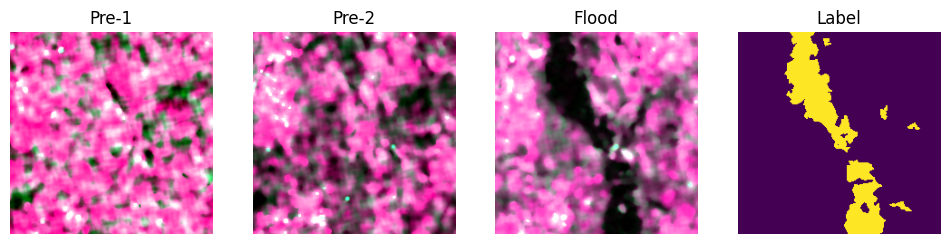

In [ ]:
ID = 1

img = dataset_train[ID]['image']
img0 = img[:2, :, :]
img1 = img[2:4, :, :]
img2 = img[4:, :, :]
img0 = img0.permute(1, 2, 0).numpy()
img0 = np.stack([img0[:,:,0], img0[:,:,1], (img0[:,:,0]+img0[:,:,1])/2], axis=-1)
img0 = normalize(img0)
img1 = img1.permute(1, 2, 0).numpy()
img1 = np.stack([img1[:,:,0], img1[:,:,1], (img1[:,:,0]+img1[:,:,1])/2], axis=-1)
img1 = normalize(img1)
img2 = img2.permute(1, 2, 0).numpy()
img2 = np.stack([img2[:,:,0], img2[:,:,1], (img2[:,:,0]+img2[:,:,1])/2], axis=-1)
img2 = normalize(img2)


label = dataset_train[ID]['mask']


plt.figure(figsize=(12, 5))


plt.subplot(1, 4, 1)
plt.imshow(img0)
plt.title('Pre-1')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(img1)
plt.title('Pre-2')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(img2)
plt.title('Flood')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(label)
plt.title('Label')
plt.axis('off')

# save pdf
#plt.savefig('./assets/vis_flood_s1.pdf', bbox_inches='tight')

In [ ]:
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=16, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=16, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=16, shuffle=False, num_workers=4)

# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta'][0]
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta'][0]
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta'][0]
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)

100%|██████████| 63/63 [00:07<00:00,  8.40it/s]


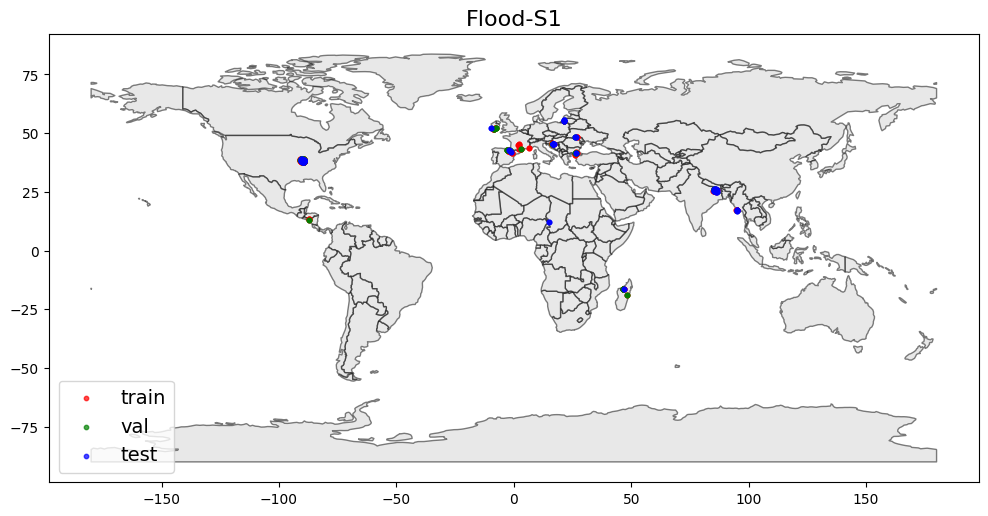

In [ ]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal


geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("Flood-S1", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_flood_s1.pdf', bbox_inches='tight')

# save png 
#plt.savefig('./assets/distribution_flood_s1.png', bbox_inches='tight', dpi=100)

### LCZ-S2

In [ ]:
from src.datasets.cobench_lczs12_wrapper import CoBenchLCZS12

bands_s1 = ['S1_B6', 'S1_B5']
bands = ['S2_B04', 'S2_B03', 'S2_B02']

root_dir = './data/copernicusbench/so2sat_s1s2'

dataset_train_s1 = CoBenchLCZS12(
            root=root_dir, split="train", modality='s1', bands=bands_s1, transforms=None
        )

dataset_train = CoBenchLCZS12(
            root=root_dir, split="train", modality='s2', bands=bands, transforms=None
        )

dataset_val = CoBenchLCZS12(
            root=root_dir, split="val", modality='s2', bands=bands, transforms=None
        )

dataset_test = CoBenchLCZS12(
            root=root_dir, split="test", modality='s2', bands=bands, transforms=None
        )

tensor(16) tensor(16)


Text(0.5, -0.0, 'Water')

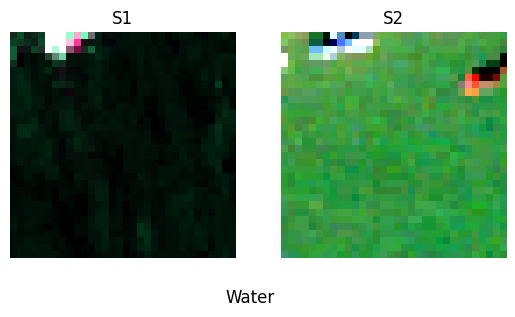

In [ ]:
# visualize one example
ID = 4

img1 = dataset_train_s1[ID]['image']
img1 = img1.permute(1, 2, 0).numpy()
img1 = normalize(img1)
img1 = np.stack([img1[:,:,0], img1[:,:,1], (img1[:,:,0]+img1[:,:,1])/2], axis=-1)
label1 = dataset_train_s1[ID]['label']

img2 = dataset_train[ID]['image']
img2 = img2.permute(1, 2, 0).numpy()
img2 = normalize(img2)
label2 = dataset_train[ID]['label']

print(label1, label2)

# label id to class
label_name = dataset_train.classes[label2]

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('S1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('S2')
plt.axis('off')
#plt.show()
# print one label for both in the figure
#plt.suptitle('Comparison of S1 and S2', fontsize=14)
#plt.text(0.5, 20, 'Sentinel Images', ha='center', fontsize=12)
plt.subplots_adjust(bottom=-0.28)  # Reduce bottom margin
plt.suptitle(label_name, y=-0.0)

# save pdf
#plt.savefig('./assets/vis_bigearthnet_s12_2.pdf', bbox_inches='tight')

In [ ]:
# plot geographical distribution
# LCZS12 has no geographical information

### Biomass-S3

In [3]:
from src.datasets.cobench_biomasss3_wrapper import CoBenchBiomassS3

root_dir = './data/copernicusbench/biomass_s3olci/biomass_s3'
bands = ['Oa08_radiance', 'Oa06_radiance', 'Oa04_radiance']

dataset_train = CoBenchBiomassS3(
            root=root_dir, split="train", bands=bands, mode='series', transforms=None
        )

dataset_train_static = CoBenchBiomassS3(
            root=root_dir, split="train", bands=bands, mode='static', transforms=None
        )

dataset_val_static = CoBenchBiomassS3(
            root=root_dir, split="val", bands=bands, mode='static', transforms=None
        )

dataset_test_static = CoBenchBiomassS3(
            root=root_dir, split="test", bands=bands, mode='static', transforms=None
        )

(-0.5, 287.5, 287.5, -0.5)

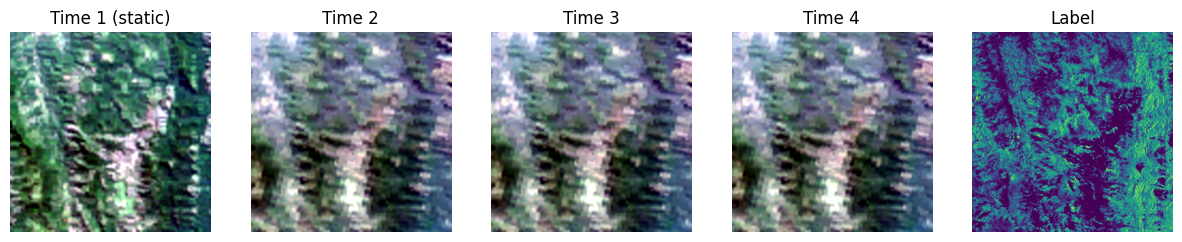

In [4]:
ID = 3

# img = dataset_train_static[ID]['image']
# img = img.permute(1, 2, 0).numpy()
# img = normalize(img)

ts_imgs = dataset_train[ID]['image']
for i in range(len(ts_imgs)):
    ts_imgs[i] = ts_imgs[i].permute(1, 2, 0).numpy()
    ts_imgs[i] = normalize(ts_imgs[i])

label = dataset_train[ID]['groundtruth']

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(ts_imgs[0])
plt.title('Time 1 (static)')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(ts_imgs[1])
plt.title('Time 2')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(ts_imgs[2])
plt.title('Time 3')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(ts_imgs[3])
plt.title('Time 4')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(label)
plt.title('Label')
plt.axis('off')

# save pdf
#plt.savefig('./assets/vis_biomass_s3_1.pdf', bbox_inches='tight')

In [ ]:
# plot geographical distribution
dataloader_train = torch.utils.data.DataLoader(dataset_train_static, batch_size=16, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val_static, batch_size=16, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test_static, batch_size=16, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 63/63 [00:17<00:00,  3.59it/s]


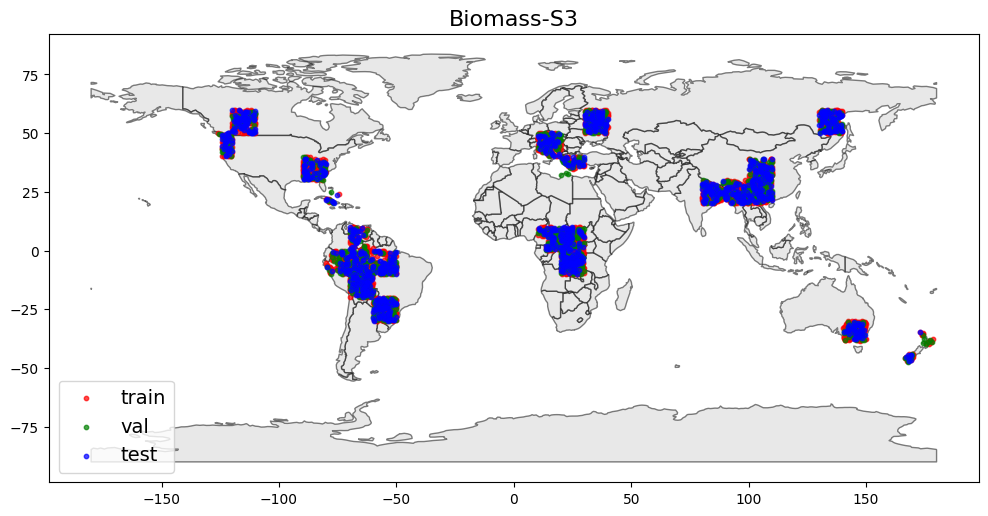

In [7]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

# color_train = '#fe218b' #"#D55E00"  # Distinct orange/red
# color_val = '#fed700' #"#0072B2"    # Strong blue
# color_test = '#21b0fe' #"#009E73"   # Teal

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

# color_train = '#E64B35'
# color_val = '#F0D420'
# color_test = '#357EBD'


geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)


# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("Biomass-S3", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_biomass_s3.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_biomass_s3.png', bbox_inches='tight', dpi=100)

### AQ-NO2-S5P & AQ-O3-S5P

In [8]:
from src.datasets.cobench_airqualitys5p_wrapper import CoBenchAirQualityS5P

root_dir = './data/copernicusbench/airquality_s5p/airquality_s5p'


dataset_train_no2_annual = CoBenchAirQualityS5P(
            root=root_dir, split="train", modality='no2', mode='annual', transforms=None
        )

dataset_train_no2_seasonal = CoBenchAirQualityS5P(
            root=root_dir, split="train", modality='no2', mode='seasonal', transforms=None
        )

dataset_train_o3_annual = CoBenchAirQualityS5P(
            root=root_dir, split="train", modality='o3', mode='annual', transforms=None
        )

dataset_train_o3_seasonal = CoBenchAirQualityS5P(
            root=root_dir, split="train", modality='o3', mode='seasonal', transforms=None
        )   

dataset_val_no2_annual = CoBenchAirQualityS5P(
            root=root_dir, split="val", modality='no2', mode='annual', transforms=None
        )

dataset_test_no2_annual = CoBenchAirQualityS5P(
            root=root_dir, split="test", modality='no2', mode='annual', transforms=None
        )


(-0.5, 55.5, 55.5, -0.5)

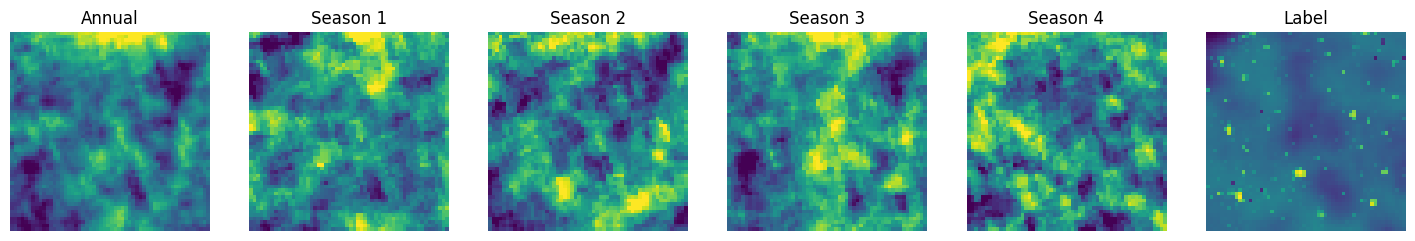

In [ ]:
# visualize one example
# no2
ID = 1

img = dataset_train_no2_annual[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)

ts_imgs = dataset_train_no2_seasonal[ID]['image']
for i in range(len(ts_imgs)):
    ts_imgs[i] = ts_imgs[i].permute(1, 2, 0).numpy()
    ts_imgs[i] = normalize(ts_imgs[i])

label = dataset_train_no2_annual[ID]['groundtruth']

plt.figure(figsize=(18, 5))

plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Annual')
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(ts_imgs[0])
plt.title('Season 1')
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(ts_imgs[1])
plt.title('Season 2')
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(ts_imgs[2])
plt.title('Season 3')
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(ts_imgs[3])
plt.title('Season 4')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(label)
plt.title('Label')
plt.axis('off')

# save pdf
#plt.savefig('./assets/vis_aqno2_s5p.pdf', bbox_inches='tight')

(-0.5, 55.5, 55.5, -0.5)

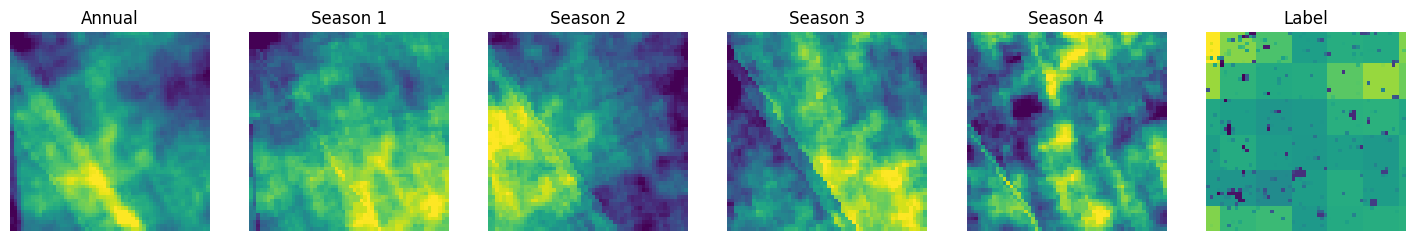

In [10]:
# o3
ID = 1

img = dataset_train_o3_annual[ID]['image']
img = img.permute(1, 2, 0).numpy()
img = normalize(img)

ts_imgs = dataset_train_o3_seasonal[ID]['image']
for i in range(len(ts_imgs)):
    ts_imgs[i] = ts_imgs[i].permute(1, 2, 0).numpy()
    ts_imgs[i] = normalize(ts_imgs[i])

label = dataset_train_o3_annual[ID]['groundtruth']

plt.figure(figsize=(18, 5))

plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Annual')
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(ts_imgs[0])
plt.title('Season 1')
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(ts_imgs[1])
plt.title('Season 2')
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(ts_imgs[2])
plt.title('Season 3')
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(ts_imgs[3])
plt.title('Season 4')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(label)
plt.title('Label')
plt.axis('off')

# save pdf
#plt.savefig('./assets/vis_aqo3_s5p.pdf', bbox_inches='tight')

In [11]:
dataloader_train = torch.utils.data.DataLoader(dataset_train_no2_annual, batch_size=16, shuffle=False, num_workers=4)
dataloader_val = torch.utils.data.DataLoader(dataset_val_no2_annual, batch_size=16, shuffle=False, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test_no2_annual, batch_size=16, shuffle=False, num_workers=4)
# get the coordinates
coords_train = []
for i, data in enumerate(tqdm(dataloader_train)):
    meta = data['meta']
    coords_train.append(meta[:, :2].numpy())
coords_train = np.concatenate(coords_train, axis=0)

coords_val = []
for i, data in enumerate(tqdm(dataloader_val)):
    meta = data['meta']
    coords_val.append(meta[:, :2].numpy())
coords_val = np.concatenate(coords_val, axis=0)

coords_test = []
for i, data in enumerate(tqdm(dataloader_test)):
    meta = data['meta']
    coords_test.append(meta[:, :2].numpy())
coords_test = np.concatenate(coords_test, axis=0)


100%|██████████| 31/31 [00:07<00:00,  4.26it/s]


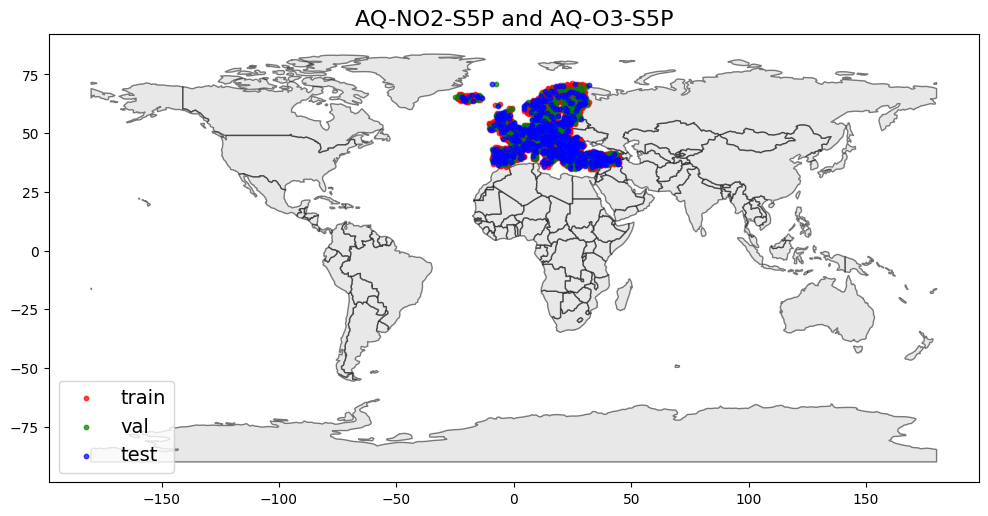

In [12]:
# show the coordinates on the world map
# Load world map from GeoPandas
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
# Convert coordinate arrays into GeoDataFrames
def create_geodf(coords, color):
    geometry = [Point(lon, lat) for lon, lat in zip(coords[:, 0], coords[:, 1])]
    return gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326"), color

color_train = 'red' #"#D55E00"  # Distinct orange/red
color_val = 'green' #"#0072B2"    # Strong blue
color_test = 'blue' #"#009E73"   # Teal

geo_train, color_train = create_geodf(coords_train, color_train)
geo_val, color_val = create_geodf(coords_val, color_val)
geo_test, color_test = create_geodf(coords_test, color_test)

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)  # Plot country boundaries
#world.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot country boundaries

# Plot different coordinate sets
geo_train.plot(ax=ax, color=color_train, markersize=10, alpha=0.7, label="train")
geo_val.plot(ax=ax, color=color_val, markersize=10, alpha=0.7, label="val")
geo_test.plot(ax=ax, color=color_test, markersize=10, alpha=0.7, label="test")

ax.set_aspect('equal')

# Turn off axis
#ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])

# Customize plot
plt.title("AQ-NO2-S5P and AQ-O3-S5P", fontsize=16)
plt.legend(fontsize=14, loc='lower left')

# save pdf
#plt.savefig('./assets/distribution_aq_s5p.pdf', bbox_inches='tight')

# save png
#plt.savefig('./assets/distribution_aq_s5p.png', bbox_inches='tight', dpi=100)